## Intro
Data science combines statistics, maths, specialised programs, AI, ML, etc.. Application of specific principles and analytic techniques to extract information from data used in strategic planning, decision making, etc.

\

* **Handling missing values:** If the dataset is large, we can just remove rows with missing data. For smaller datasets, we can substitute it with the mean or average, using df.mean(), or df.fillna(mean),..
* **Handling outliers:** if the data has garbage value or has extreme values you can drop it. Otherwise, you can maybe try different models, normalize data or use algorithms that are less affected by it
* Difference between **error terms and residuals:** an error term is generally unobservable and a residual is observable and calculable, making it much easier to quantify and visualize. In effect, while an error term represents the way observed data differs from the actual population, a residual represents the way it differs from sample population data. Residuals actually helps us get an accurate estimate of the error.
* **RMSE** is used to measure the deviation of the residuals, and MSE is used to find how close is the line to the actual data. Other metrics: MAE (mean absolute error), MAPE (mean absolute percentage error). 
    *from sklearn.metrics import .......*
* **Cost vs loss function:** loss function refers to the error of one training example, while a cost function calculates the average error across an entire training set
* **Confusion matrix** is used to describe the performance of the classification model.
                     
    |    | Actual Positive | Actual Negative | 
    |:--:+:--:|:--:|
    | **Predicted Positive** | True Positive | False Positive |
    | **Predicted Negative** | False Negative | True Negative |
 
                     
    - **accuracy:** (true positive + true negative) / total observations.. RMSE is a measure of accuracy in regression
    - **error rate:** (false positive + false negative) / total observations
	- **precision:** true positive / (true positive + false positive) 
	- **specificity:** true negative / (true negative + false positive)
    - **sensitivity/recall:** true positive / (true positive + false negative).. helps to identify the misclassified positive predicitions
    
    Accuracy metric can be reliable metric only if the dataset is class-balanced. F1 score is a ML evaluation metric that assesses the predictive skill of a model by elaborating on its class-wise performance rather than an overall performance as done by accuracy. If accuracy is 100%, then F1 = 1.
    
    $$ F1 = 2 * \text{precision} * \text{recall} / (\text{precision + recall}) $$
        
    **Cut off/threshold** is the probability that the prediction is true. It represents the tradeoff between false positives and false negatives. Normally, the cut-off will be on 0.5 (random) but you can increase it. All predicted outcome with a probability above it will be classified in the first class and the other in the second class.

## Statistics
* **Deterministic vs stochastic process:** a deterministic process is a mathematical model where the output depends solely on the input, and there is no randomness involved. In contrast, a stochastic process is a mathematical model that involves randomness and is used to model situations that may not have inherent randomness. A deterministic model is completely predictable also.
* **Unit root** is a feature of some stochastic processes. A linear stochastic process has a unit root if 1 is a root of the process's characteristic equation. Such a process is non-stationary. If the other roots of the characteristic equation lie inside the unit circle, then the first difference of the process will be stationary; otherwise, the process will need to be differenced multiple times to become stationary.
* **Bias** is a systematic tendency to underestimate or overestimate the value of a parameter (you were not random!). It implies that the data selection may have been skewed by the collection criteria (in favor or against an idea). It can also be defined as a systematic (built-in) error which makes all values wrong by a certain amount. In ML, the inability for a ML method to capture the true relationship is called bias, that happens because algorithm makes simplified assumptions so that it can easily understand the target function.

| **Bias** | **Error** | 
|:-----:|:-----:|
| Produces prejudiced results | Results in inaccurate outcomes |
| Identified manually or through software packages | Identified through calculations |
| Occurs systematically | Occurs randomly |

* **Normal/uniform distribution** is the kind of distribution that has no bias either to the left or to the right and is in the form of a bell-shaped curve. In this distribution, mean is equal to the median.
* **Skewed distribution** is a distribution where the curve is inclined towards one side.
* **Variance** is a statistical measurement used to determine the average of each point from the mean (the average of the squared differences from the mean). In ML the difference in fits between training and test sets is called variance, i.e. it refers to the changes in the model when using different portions of the training data set. Simply put, variance is the variability in the model prediction. **Standard deviation** is the spread of a group of numbers from the mean.

$$ Var(X) = E[X^2] – E[X]^2 $$

| **Signs of high bias ML model** | **Signs of high variance ML model** | 
|:-----:|:-----:|
| Failure to capture data trends | Noise in data set |
| Underfitting | Overfitting |
| Overly simplified | Complexity |
| High error rate | Forcing data points together |

* **Robustness** represents the system's capability to handle differences and variances effectively
* Total error = variance + bias + irreducible error

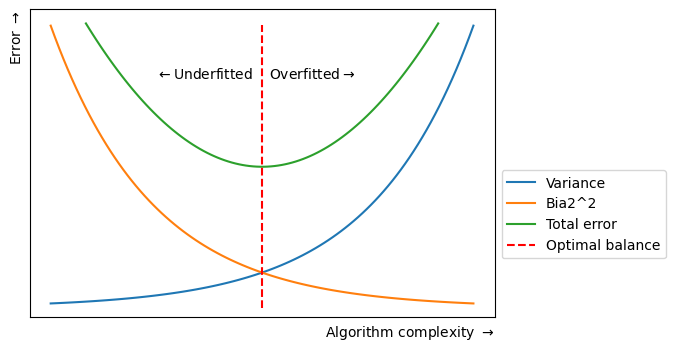

In [56]:
#|echo: false
#|fig-align: "center"

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams.update(mpl.rcParamsDefault)

def f(x):
    return 2**(x)+1

def g(x):
    return (1/2)**(x)+1

def h(x):
    return 0.65*x**2 + 5

x = np.linspace(-3,3,100)
x2 = np.linspace(-2.5,2.5,100)

var = f(x)
bias = g(x)
error = h(x2)

plt.figure(figsize=(6,4))

plt.plot(x,var)
plt.plot(x,bias)
plt.plot(x2,error)

plt.axvline(ymin=0.03, ymax=0.95, linestyle="--", color='r')
plt.gca().text(-1.5, 7.5, r'$\leftarrow$Underfitted')
plt.gca().text(0.1, 7.5, r'Overfitted$\rightarrow$')

plt.legend(["Variance", "Bia2^2", "Total error", "Optimal balance"], bbox_to_anchor=(1, 0.5))

plt.xlabel(r'Algorithm complexity $\rightarrow$', loc="right")
plt.ylabel(r'Error $\rightarrow$', loc="top")

plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

* **Correlation vs covariance:** correlation is a measure of relationship between two variables and says how strong are the variables related. Range is -1 to 1. Covariance represents the extent to which the variables change together in a cycle. This explains the systematic relationship between pair of variables where changes in one affect changes in another variable. Range is -inf to +inf, and is affected by scalability.
* **Confounding variables** are extraneous variables in a statistical model that correlates directly or inversely with both the dependent and the independent variable. Left unchecked, confounding variables can introduce many research biases to your work, causing you to misinterpret your results.
* **R-squared/coefficient of determination** is a statistical measure in a linear regression model that determines the proportion (percentage) of the variance in the dependent variable that can be explained by the independent variable. In other words, it evaluates the scatter of the data points around the fitted regression line, i.e. shows how well the regression model explains observed data.

$$\begin{aligned}
R^{2} &= 1 - \frac{\text{Residual variance}}{\text{Total variance}} \\
&=\frac{\text{Total variance - Residual variance}}{\text{Total variance}} \\
&=\frac{\text{Explained variance}}{\text{Total variance}} \\
&=\text{Fraction of total variance explained}
\end{aligned}$$

* **p-value** is the measure of the statistical importance of an observation. We compute the p-value to understand whether the given data really describes the observed effect or not. If p<=0.05 it suggests that there is only 5% chance that the outcomes of an experiment are random and the null hypothesis must be rejected.
$$ p_{value} = P(E|H_{0}) $$
* **The statistical power** of a binary hypothesis test is the probability that the test rejects the null hypothesis when a specific alternative hypothesis is true
* **Confidence interval** is a range of values likely containing the population parameter. **Confidence level** is denoted by 1-$\alpha$, where $\alpha$ is level of significance (usually 5%). **Point estimate** is an estimate of the population parameter (can be derived with Maximum Likelihood estimator for egz.)
![](Picture7.png){fig-align="center"}

* **Univariate, bivariate and multivariate analysis:** univariate analysis allows us to understand the data and extract patterns and trends out of it. Bivariate analysis allows us to figure out the relationship between the variables. Multivariate analysis allows us to figure out the effects of all other variables (input variables) on a single variable (the output variable).
* **Sampling** is the selection of individual members or a subset of the population to estimate the characters of the whole population. It is useful with datasets that are too large to efficiently analyze in full. There are two types of sampling techniques: probability and non-probability. **Resampling** is the process of changing/exchanging data samples, identifying the impact of these changes on model and prediction characteristics, and continuing until optimal results are achieved. It is done in cases of estimating the accuracy of sample statistics or validating models by using random subsets to ensure variations are handled (egz. Bootstraping, cross-validation)

    Types of biases that can occur during sampling: selection bias, undercoverage bias and survivorship bias. **Selection bias** occurs when a sample selection does not accurately reflect the target population. **Survivorship bias** is the logical error of focusing on aspects that support surviving a process and casually overlooking those that did not. This can lead to wrong conclusions in numerous ways.
* **Bootstrap method** is a resampling method by independently sampling with replacement from an existing sample data with same sample size n, and performing inference among these resampled data.
* **Normalization/Min-Max scaling** is used to transform features to be on a similar scale ([0,1] or [-1,1]). It is useful when there are no outliers.
$$ X_{new} = (X - X_{min}) / (X_{max} - X_{min}) $$
    Normalization is useful when your data have different dimensions and the method you're employing doesn't   make assumptions about the distirbution of you data.
* **Standardization/Z-score** normalization is the transformation of features by subtracting from mean and dividing by standard deviation. It is not affected with outliers since its not bounded to a certain range. Changing the range of your data with scaling is different from changing the distribution of your data with Normalization. Also, standardization presupposes that the distribution of your data is Gaussian.
$$ z = \frac{x-\mu}{\sigma}, $$
    where $\mu$ represents the mean and $\sigma$ represents the standard deviation.
* **The Central limit theorem** says that, given a large enough sample size, the distirbution of sample averages/means will be approximtely normal. This means that we can use normal distirbution to make predictions about populations based on samples.
* **The Law of large numbers** is a theorem that describes the result of performing the same experiment very frequently. It states that the sample mean, sample variance, and sample standard deviation converge to what they are trying to estimate
* **Gradient**, for purposes of this paper, measures how much the output of a function changes if you change the inputs a little bit (from a given point). 
* **Categorical, continuous and ordinal variables.** An ordinal variable is a categorical variable for which the possible values are ordered.
* **Histrograms vs boxplots:** Boxplots are more often used in comparing several datasets and take less space than histograms. Histograms are used to know and understand the probability distribution underlying a dataset
* **Histograms vs bar graphs:** a bar graph is the graphical representation of categorical data, whereas a histogram is the graphical representation of data where data is grouped into continuous number ranges
* **Kernel density estimation (KDE)** is a method for visualizing the distirbution of observations in  dataset over a continuous interval or time period
* **Histograms vs density plots:** an advantage that density plots have over histograms is that they're better at determining the distribution shape because they are not affected by the number of bins used.
* **Akaike information Criterion (AIC):** is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, it is used to compare different possible models (model selection). Lower AIC scores are better!

### Time series analysis
Time series analysis (TSA) is a mathematical approach for predicting or forecasting the future pattern of data using historical data arranged in a successive order for a particular time period. *statsmodels.tsa* package contains model classes and functions that are useful for time series analysis.

* **Prediction vs forecasting:** prediction is concerned with estimating the outcomes of unseen data. Forecasting is a sub-discipline of prediction in which we are making predictions about the future on the basis of time series data, so the only difference is that we consider the temporal dimension
* **Trend vs season vs cyclic:** A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency. A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency.
* **Rolling average/ moving average** is a metric that calculates trends over short periods of time using a set of data. Is uses smaller parts of the data and then rolls or moves for each new period. Calculating next rolling period involves leaving off your earliest unit and adding in your next unit. For egz., if you want to track down monthly data, take 12-months rolling period. After calculating average of 12 months, leave first month and add new month, then calculate average again for new rolling period. In that way, rolling period keeps moving.
* **Augmented Dickey-Fuller test:** tests the null hypothesis that a unit root is present in a time series sample. It is a negative number, and the more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

    There are 3 main versions of the test (Dickey-Fuller test is presented for simplicity):
    1. Test for a unit root: $\Delta y_{t} = \delta y_{t-1} + u_{t} \quad(u_{t} \text{ is error term})$
    2. Test for a unit root with constant: $\Delta y_{t} = a_{0} + \delta y_{t-1} + u_{t}$
    3. Test for a unit root with constant and deterministic time trend: 
            $\Delta y_{t} = a_{0} + a_{1}t + \delta y_{t-1} + u_{t}$
            
    -> Hypothesis: H0: δ = 0 (process is not stationary)
			       H1: δ < 0 (process is stationary)
                   
    -> from statsmodels.tsa.stattools import adfuller. For additional parameters, it is the best practice to put autolag='AIC'. regression parameter has 4 parameters: 'c' for only constant (default), 'ct' for constant and trend, 'ctt' for constant and linear and quadratic trend, 'n' for no constant and no trend.
    
    -> Which version of test to choose? δ needs to be <= 0, so one way to find out is to see if it fits in the right interval. Other way is to compare AIC values and choose lowest. Also by inspecting data we can assume which to choose, but the best way is to perform all 3 types and inspect results.

* **Stationary time series:** the only assumption in TSA is that the data is *stationary*. Data is stationary when the variance and mean of the series are constant with time, with no periodic component (independent of time influence).
    - Check it with Augmented Dickey-Fuller test
    - Trend can result in a varying mean over time, wheras seasonality can result in a changing variance over time, both which define a time series as being non-stationary. (stationary datasets are much easier to  model). 
    - **Differencing** is a widely used data transform for making time series data stationary. Notice that some temporal structures may still exist after performing a differencing operation, such as in the case of a nonlinear trend. The number of times that differencing is performed is called the difference order. DataFrame diff() function can be used.
    
* There are two popular types of non-stationary time series:
    a. **Trend-stationarity time series** are those whose mean trend is deterministic. In other words, the mean of the time series changes over time but at a constant rate. The time series is not stationary in the strict sense, but it is stationary in the sense that the trend is stable and predictable
    b. **Difference-stationarity time series** have a mean trend that is stochastic. In other words, the mean of the time series changes over time in a random pattern.

* **Log transform:** time series with an exponential distribution can be made linear by taking the logarithm of the values. Log transforms are popular with time series data as they are effective at removing exponential variance
* **Autocorrelation analysis** is used in detecting patterns and checking for randomness. The analysis involves looking at the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. 

    - Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals. ACF function measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lenghts.
    - Partial autocorrelation is similar to autocorrelation except that each partial correlation controls for any correlation between observations of a shorter lag length. For egz., at second lag, the PACF measures the correlation between data points at time „t“ with data points at time „t-2“, while the ACF measures the same correlation but after controlling for the correlation between data points at time „t“ with those at time „t-1“.
    - *from statsmodels.graphics.tsaplots import plot_acf, plot_pacf*
    - Stationarity of time series can be inspected with ACF plot (along with ADF test). In case the autocorrelations are positive for multiple lags, the series requires further differencing; but if lag 1 autocorrelated itself pretty negatively, then the series is possibly over-differenced


#### Models
* **AutoRegressive model (AR):** it is a linear model where current period values are a sum of past outcomes multiplied by a numeric factor. We denote it as AR(p), where „p“ is called the order of the model and represents the number of lagged values we want to include. p can be determined from PACF plot. For p=1:
$$ X_{t} = C + \phi_{1}X_{t-1} + \varepsilon_{t}, $$
    The coefficient $\phi_{1}$ is a numeric constant with value between -1 and 1. When multiplied with past value it represents a part which remains in the future. You would choose an AR model if you believe that previous observations have a direct effect on the time series. 

* **Moving Average (MA):** it's a statistic that captures the average change in data series over time. We denote it as MA(q), where „q“ is called the order of the model and represents the number of past forecast errors (or the size of the moving average window).  q can be determined from ACF plot. You would choose an MA model if you believe that the errors have a direct effect on the time series.
* **AutoRegressive Moving Average (ARMA):** p,q
* **AutoRegressive Integrated Moving Average (ARIMA):** p,d,q.. where d is the difference order
* **AutoRegressive Moving Average with eXogeneous factors (ARMAX):** exogeneous variables are external data used in forecast (external effects)
* **Seasonal AutoRegressive Integrated Moving Average (SARIMA):** p,d,q,P,D,Q,m.. where m is the number of time steps for a single seasonal period, p,d,q are trend elements and P,D,Q are seasonal elements
* **Seasonal AutoRegressive Integrated Moving Average with eXogeneous factors (SARIMAX)**

    STEPS FOR BUILDING ONE OF THESE MODELS:
    1)	Check for stationarity of time series and perform differencing if needed. This is because the term „autoregressive“ implies Linear Regression model (using its lags as predictors) and it works well for independent and non-correlated predictors 
    2)	Determine parameters. It can be done with inspecting acf/pacf plots
    3)	Fit the model. Inspect coefficients and P(>|z|) with .summary() function and decide if it is needed for further tuning of parameters
    4)	Check residuals for making sure model has captured adequte information from the data (they should look like white noise). If density looks normally distirbuted, model is ready.
    5)	Make predictions (using .forecast() or .predict() function)
    6)	Evaluate model predictions using common metrics (MAE, RMSE,..)

        - Alternatively, use *pmdarima* package and *auto_arima* function to automate steps 1 to 3. Be aware that sometimes the manually fitted model is closer to the actual test set
        - Alternatively, use plot_diagnostics to automate step 4. Values of good fit:
            a. Standardized residual: there are no obvious patterns in residuals, with values having a mean of zero
            b. The KDE curve should be very similar to the normal distribution
            c. Normal Q-Q: most of the data points should lie on the straight line
            d. Correlogram: 95% of correlations for lag greater than zero should not be significant

        - Suggestion: conduct time series cross-validation to select the best model, i.e. repeat model assessment for different train / test sets
        - Pro tip: if data shows exponential trend you can do a log transform before applying a model, then later apply inverse transformation (exponential function)

##### Useful tips/functions
* Date increment used for a date range: *pandas.tseries.offsets.DateOffset*

## Machine learning
Hypothesis in the content of ML represents a mathematical function that an algorithm uses to represent the relationship between the target variable and features. Learnings can be divided into supervised and unsupervised learning.

| **Supervised learning** | **Unsupervised learning** | 
|:-----:|:-----:|
| Works on the data that contains both inputs and the expected output, i.e. the labeled data | Works on the data that contains no mappings from input to output, i.e. the unlabeled data |
| Used to create models that can be employed to predict or classify things | Used to extract meaningful information out of large volumes of data |
| Egz. Decision trees, logistic regression, svm | Egz. K-means clustering, hierarchical clustering, apriori algorithm |

* **Test set vs validation set:** test set is used to evaluate the performance of the trained model, and the validation set is part of the training set that is used to select parameters for avoiding model overfitting. (80% training, 10% validation, 10% test)


### Regression and classification algorithms
* **Regression:** linear (when variables are continuous and numeric) and logistic (when variables are continuous and categorical)
     -	**Linear regression** is supervised learning algorithm, which helps in finding the linear relationship between two variables. It finds the smallest sum of squared residuals that is possible for the dataset.
     
* **Classification** refers to a predictive modeling process where a class label is predicted for a given example of input data. It helps categorize the provided input into a label that other observations with similar features have.
     - **Naive Bayes** is supervised classification ML algorithm based on the Bayes theorem, which deals with the probability of an event occuring given that another event has already occured (i.e. mathematical formula for determining conditional probability). It is based on two assumptions, first, each feature/attribute present in the dataset is independent of another, and second, each feature carries equal importance. It has „naive“ in it because it assumes that the occurence of a certain feature is independent of the occurence of other features (hence each feature individually contributes to identify the result), which is unrealistic for real-world data
     - **Support vector machine (SVM)** is a supervised ML model that considers the classification algorithms for two-group classification problems. It is a representation of the training data as points in space that are seperated into categories with the help of a clear gap that should be as wide as possible. **Kernel function** is used to transform the data that is not linearly separable into one that is. It is generalized dot product function used for the computing dot product of vectors xx and yy in high dimensional feature space. This transformation is based on kernel trick (projecting data onto a higher dimension space where it can be linearly divided by a plane).
     - **Logistic regression** is classification algorithm that is used to predict the probability of certain classes based on some dependent variables. Estimating probability is done by using its underlying logistic function (sigmoid). In short, the logistic regression model computes a sum of the input features and calculates the logistic of the result.
     
       Altough it is classiciation algorithm (it predicts a discrete class), it is part of the regression family as it involves predicting outcomes based on quantitative relationships between variables. Unlike, linear regression, it accepts both continuous and discrete variables as input and its output is qualitative. 
       
       Sigmoid function: $\quad S(x) = \frac{1}{1 + e^{-x}} = \frac{e^{x}}{e^{x} + 1} = 1 - S(-x).$

* **Elbow method** is used to select „k“ for k-means clustering. It plots the value of the cost function produced by different values of k (for egz. 1 to 15). k-means cost function is sum of squared distances of each data point to respective centroid of cluster to which the data points belong.
* **A ROC curve** is a graph showing the performance of a classification model at all classification thresholds ([0,1]). It plots two parameters: true positive rate (sensitivity) and false positive rate (1-specificity). Also, decreasing the threshold moves up along the curve. Classifiers that give curves closer to the top-left corner indicate a better performance. Note that the ROC does not depend on the class distribution and this makes it useful for evaluating classifiers predicting rare events such as diseases or disasters. In contrast, evaluating performance using accuracy would favor classifiers that always predict a negative outcome for rare events. To compare different classifiers, it is useful to summarize the performance of each classifier into a single measure- **AUC** (area under the ROC curve). The AUC is the probability the model will score a randomly chosen positive class higher than a randomly chosen negative class.

* CART is name for classification and regression trees
* **Decision tree** is non-parametric model that can be used for both classification and regression. Non-parametric means that they don't increase their number of parameters as we add more features. They are constructed using nodes and branches, where the root node testes a feature which best splits the data. Decision trees are built by recursively splitting our training samples using the features from the data that work best for the specific task. The process is done by evaluating certain metrics („information entropy“), depending if the feature is dicrete or continuous. 

    Steps are: 
    1. Take the entire data set as input
	2. Look for a split that maximizes the separation of the classes
	3. Apply the split (divide step)
	4. Re-apply steps 1) and 2) to the divided data
	5. Stop when you meet stopping criteria
	6. Pruning (clean up the tree if you went too far)

    **Entropy** in ML is the measurement of disorder or impurities in the information processed.
    
    $$ E = -\sum^{N}_{i=1}P_{i}\text{log}_{2}P_{i}, $$
    where $P_{i}$ is probability of randomly selecting an example in class i.
    
    **Information gain** is a measure of how much entropy is reduced when a particular feature is used to split the data. It calculates the difference between entropy before and after the split.

    **Pruning** is a technique that simplifies the decision tree by reducing the rules. It helps to avoid the complexity and improves accuracy.

* **Random forest** is a model built up of a number of decision trees. If you split the data into different packages and make a decision tree in each of the different groups of data. The random forest brings all those trees together (individual trees need to have low correlations with each other).

    Steps to build a model:
    1. Randomly select *k* features from a total of *m* features (k<<m)
    2. Among the *k* features, calculate the node using the best split point
    3. Split the node into daughter nodes using the best split
    4. Repeat steps two and three until leaf nodes are finalized
    5. Build forest by repeating steps one to four for *n* times to create *n* number of trees


### Tuning model parameters, evaluation
**Overfitting** referes to a model that is only set for a very small amount of data and ignores the bigger picture.

| There are three main methods to avoid it:
|   - feature selection
|   - cross-validation
|   - feature engineering  (creating more data samples using the existing set of data, for egz. In CNN it is producing new images by rotating, scaling, flipping,..)
|   - regularization
|   - early stopping (regularization technique that identifies the point from where the training data leads to generalization error
|   - dropouts (regularization technique used in the case of NN where we randomly deactivate a proportion of neurons in each layer)

* Dimensionality reduction helps in compressing data and removing redundant features. **Feature selection** is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

\
$~~~~~~~~$- Filter method: features are dropped based on their relation to the output, or how they are correlating to the output

$~~~~~~~~$- Wrapper method: we split our data into subsets and train a model using this. Based on the output of the model, we add and subtract features and train the model again. It forms the subsets using a greedy approach and evaluates the accuracy of all the possible combinations of features.

* **Multicollinearity** is reflected in the model when independent variables in a multiple regression model are deduced to possess high correlations with each other. It can be overcomed by removing a few highly correlated variables from the equation.

* **Feature scaling** is one of the most important data preprocessing steps in ML. Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled. Most popular are normalizaton and standardization. Also, sklearn library provides transformers *MinMaxScaler* and *StandardScaler*.
* **Feature engineering** is the method that is used to create new features from the given dataset using the existing variables. For egz. Imputation, discretization, categorical encoding,..
* **Cross-validation** is a statistical method used to estimate the performance of ML models. It is used to protect against overfitting in a  predictive model, particularly in a case where the amount of data may be limited.

    **k-fold cross validation** guarantees that the score of our model does not depend on the way we picked the train and test set. The data is first randomly divided into k number of subsets. For each subset in your dataset, build your model on k-1 subsets of the dataset. Then, test the model to check the efectiveness for kth subset. Repeat this until each of k-subsets has served as the test set. The average of your *k* recorded accuracy is called the cross-validation accuracy and will serve you as your performance metric for the model. The disadvantage of this method is that the training algorithm has to be rerun from scratch *k* times. Also, it only estimates the accuracy but does not improve it.

* **Regularization** is a form of regression which discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. The general idea is to penalize complicated models by adding an additional penalty to the loss function in order to generate a larger loss. In this way, we can discourage the model from learning too many details and the model is much more general. Three popular methods are Ridge regression (L2 norm, most used), Lasso (L1 norm) and Dropout (used in neural networks). If there is noise in the training data, then estimated coefficients won't generalize well to the future data and this is where regularization comes in. It happens by adding a tuning parameter  λ that decides how much we want to penalize the flexibility of our model. As the value of λ rises, it reduces the value of coefficients and thus reducing the variance. Till a point, this increase in  λ is beneficial as it is only reducing the variance (hence avoiding overfitting), without loosing any important properties in the data. But after certain value, the model starts lossing important properties, giving rise to bias in the model and thus underfitting.
* **Ensemble learning** is combining several individual models together to improve performance.

    1. **Boosting** is one of the ensemble learning methods where we create multiple models and sequentially train them by combining weak models iteratively in a way that training a new model depends on the models trained before it. We take the patterns learned by a previous model and test them on a dataset when training the new model. In each iteration, we give more importance to observations in the dataset that are incorrectly handled or predicted by previous models. It is useful in reducing bias also.
    2. **Bagging** is an ensemble learning method where we generate some data using the bootstrap method, in which we use an already existing dataset and generate multiple samples of the „N“ size. This bootstrapped data is then used to train multiple models in parallel, which makes it more robust than a simple model. Once all the models are trained and it is time to make a prediction, we make predictions using all the trained models and then average the result in the case of regression, and for classification, we choose the result that has the highest frequency.
    3. **Stacking** is an ensemble learning method where we can combine weak models that can additionaly use different learning algorithms as well. These learners are called heterogeneous learners (boosting and bagging are homogeneous learners). Stacking works by training multiple and different weak models or learners and then using them together by training another model, called a meta-model, to make predictions.

Three commonly used methods for finding the sweet spot between simple and complicated models are: regularization, boosting and bagging.

* **Gradient descent,** in ML, is an iterative method that minimizes the cost function parametrized by model parameters. This improves the learning model's efficacy by providing feedback to the model so that it can adjust the parameters to minimize the error and find the local or global minimum. Gradient measures the change in parameter with respect to the change in error. **Learning rate** or step size is the size of the steps that are taken to reach the minimum. This is typically a small value, and it is evaluated and updated based on the behavior of the cost function. High learning rates result in larger steps but risks overshooting the minimum. There are 3 types of gradient descent method:
    - **batch gradient descent:** computation is carried out on the entire dataset
    - **stochastic gradient descent:** computation is carried over only one training sample
    - **mini batch gradient descent:** a small number/batch of training samples is used for computation

## Deep learning

Deep learning is an advanced version of neural networks (NNs with more than three layers) to make the machines learn from data.

* **RNN** (reccurent neural network) is an algorithm that uses sequential data (i.e. data that are ordered into sequences) such as timeseries, stock market, temperature, etc.
* **NLP** (natural language processing) deals with the study of how computers learn a massive amount of textual data through programming
* **Batch normalization** is a technique for training very deep neural networks that standardize the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. After this, model is less sensitive to hyperparameter tuning, high learning rates become acceptable (which results in faster training of the model), weight initialization becomes an easy task,..
* A perceptron** is the simplest NN that contains a single neuron that performs 2 functions. The first function is to perform the weighted sum of all the inputs and the second is an activation function
* **Autoencoders** are learning networks which transform inputs into outputs with minimum possible errors. Can be used in anomaly detection.
